In [1]:
import numpy as np
import pandas as pd


In [412]:
Land_and_Ocean_data = pd.read_csv("Land_and_Ocean_GlobalYear.csv")
Land_and_Ocean_data.head()


,Year,Annual Anomaly,Annual Unc.,Five-year Anomaly,Five-year Unc.
0,1850,13.675,0.178,NaN,NaN
1,1851,13.791,0.176,NaN,NaN
2,1852,13.816,0.187,-0.323,0.146
3,1853,13.810,0.166,-0.292,0.135
4,1854,13.820,0.171,-0.308,0.122


In [9]:
out_data = pd.read_excel("1900-2000-mean-out.xlsx")
out_data.head()

,temperature,year,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,15.490077,1900,NaN,NaN,NaN,NaN,NaN,每十年增幅,NaN
1,15.405811,1901,-0.005440,NaN,NaN,NaN,NaN,15.205771,NaN
2,15.462589,1902,0.003685,NaN,NaN,NaN,NaN,15.186567,-0.001263
3,15.254516,1903,-0.013457,NaN,NaN,NaN,NaN,15.403274,0.014270
4,15.081310,1904,-0.011354,NaN,NaN,NaN,NaN,15.536586,0.008655


In [10]:
in_data = pd.read_excel("1900-2000-mean.xlsx")
in_data.head()

,temperature,year,Unnamed: 2,Unnamed: 3
0,24.629795,1900,南北回归线内,南北回归线外
1,24.429189,1901,-0.008145,-0.00544
2,24.450349,1902,0.000866,0.003685
3,24.228450,1903,-0.009075,-0.013457
4,23.887559,1904,-0.01407,-0.011354


In [512]:
df=pd.DataFrame(Land_and_Ocean_data,columns=['Year','Annual Anomaly'])
dataset = dataset=pd.DataFrame(df["Annual Anomaly"])

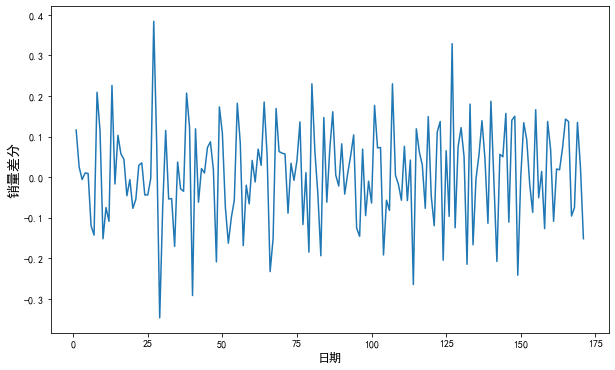

In [376]:
data1= df["Annual Anomaly"].diff(1)
plt.figure(figsize=(10, 6))
data1.plot()
plt.xlabel('日期',fontsize=12,verticalalignment='top')
plt.ylabel('销量差分',fontsize=14,horizontalalignment='center')
plt.show()

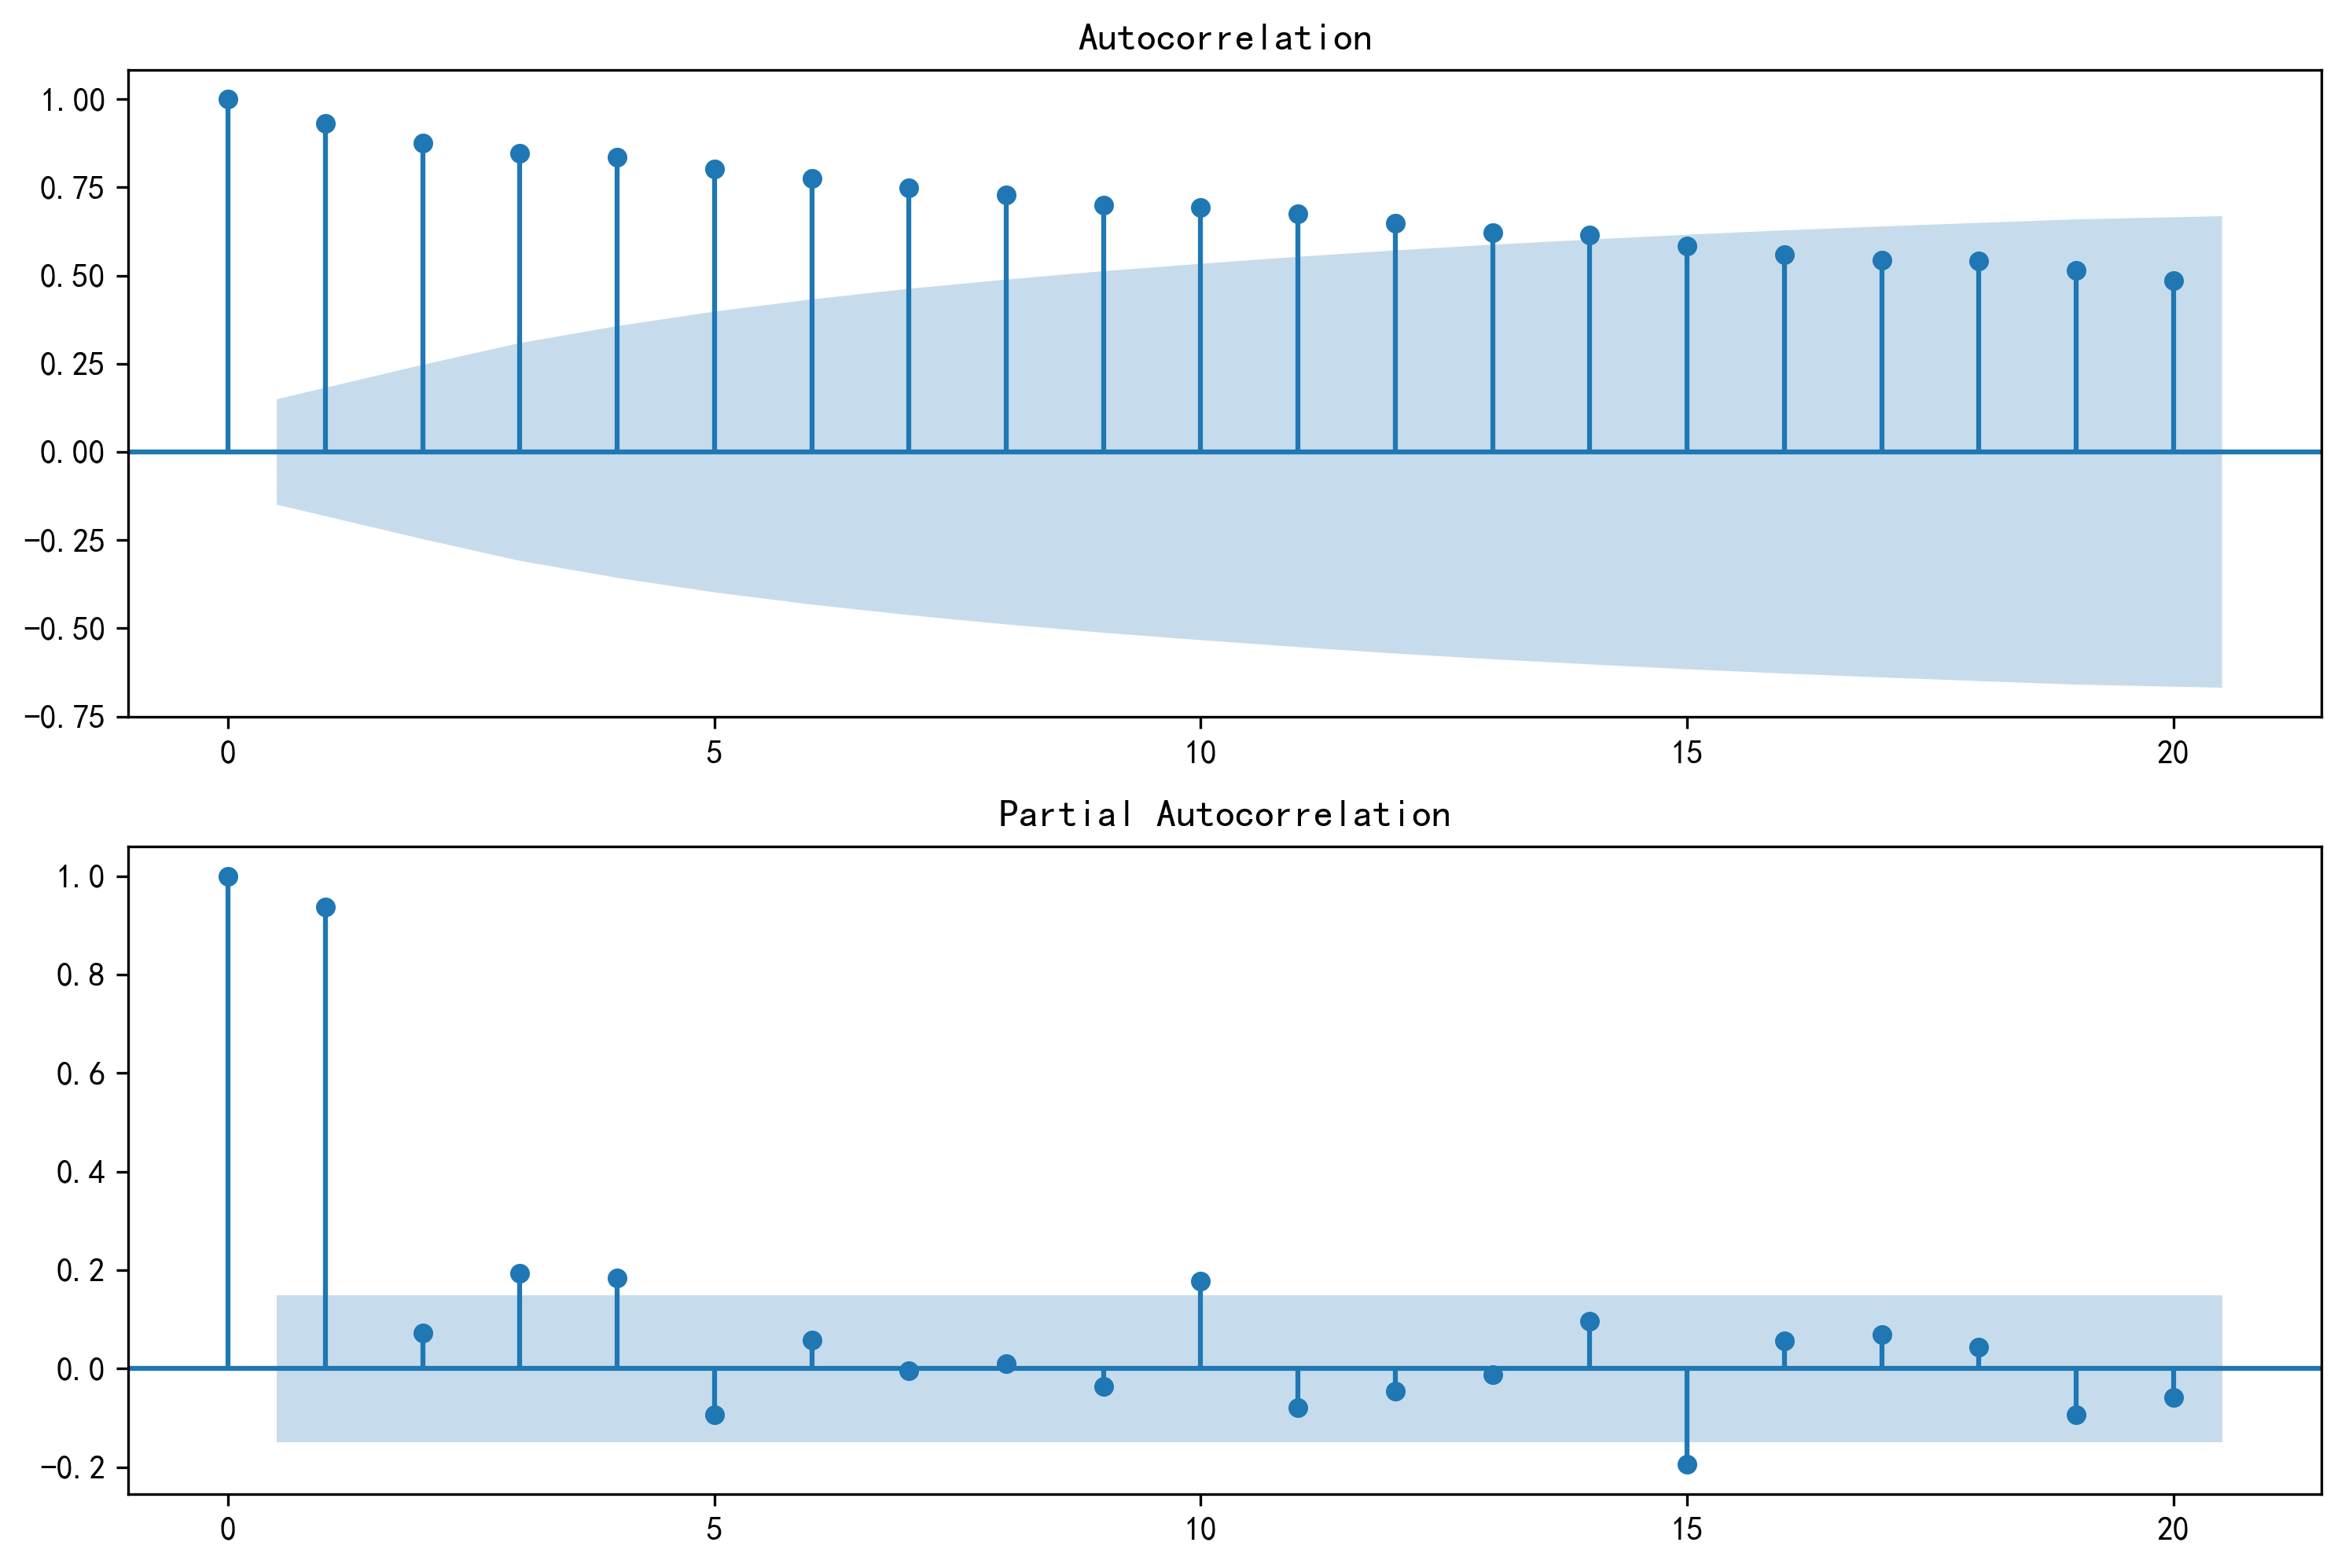

In [381]:
import statsmodels.api as sm     #acf,pacf图
from statsmodels.tsa.stattools import adfuller  #adf检验
fig = plt.figure(figsize=(12,8), dpi=300)
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Land_and_Ocean_data["Annual Anomaly"],lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Land_and_Ocean_data["Annual Anomaly"],lags=20,ax=ax2)
plt.savefig('acf,pacf.jpg')
plt.show()

In [375]:
temp = np.array(Land_and_Ocean_data["Annual Anomaly"])
t = adfuller(temp)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,1.95421
p-value,0.99861
Lags Used,9
Number of Observations Used,162
Critical Value(1%),-3.471374
Critical Value(5%),-2.879552
Critical Value(10%),-2.576373


In [377]:
# 白噪声检验（如果是白噪声，即纯随机序列，则没有研究的意义了。）
from statsmodels.stats.diagnostic import acorr_ljungbox
print(acorr_ljungbox(df["Annual Anomaly"], lags=1)) 


(array([151.75391068]), array([7.17151574e-35]))


In [513]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential, load_model

# 将整型变为float
dataset = dataset.astype('float32')
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
test_size = -8
trainlist = dataset[:test_size]
testlist = dataset[test_size:]
 
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)


#训练数据太少 look_back并不能过大
look_back = 1
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=500, batch_size=1, verbose=2)

Epoch 1/500
163/163 - 1s - loss: 0.0993 - 1s/epoch - 7ms/step
Epoch 2/500
163/163 - 0s - loss: 0.0421 - 140ms/epoch - 861us/step
Epoch 3/500
163/163 - 0s - loss: 0.0301 - 136ms/epoch - 832us/step
Epoch 4/500
163/163 - 0s - loss: 0.0264 - 142ms/epoch - 868us/step
Epoch 5/500
163/163 - 0s - loss: 0.0226 - 132ms/epoch - 810us/step
Epoch 6/500
163/163 - 0s - loss: 0.0192 - 153ms/epoch - 938us/step
Epoch 7/500
163/163 - 0s - loss: 0.0160 - 124ms/epoch - 763us/step
Epoch 8/500
163/163 - 0s - loss: 0.0132 - 138ms/epoch - 848us/step
Epoch 9/500
163/163 - 0s - loss: 0.0107 - 131ms/epoch - 805us/step
Epoch 10/500
163/163 - 0s - loss: 0.0088 - 129ms/epoch - 792us/step
Epoch 11/500
163/163 - 0s - loss: 0.0075 - 135ms/epoch - 827us/step
Epoch 12/500
163/163 - 0s - loss: 0.0067 - 125ms/epoch - 768us/step
Epoch 13/500
163/163 - 0s - loss: 0.0061 - 122ms/epoch - 751us/step
Epoch 14/500
163/163 - 0s - loss: 0.0058 - 128ms/epoch - 785us/step
Epoch 15/500
163/163 - 0s - loss: 0.0056 - 135ms/epoch - 825us

Epoch 122/500
163/163 - 0s - loss: 0.0057 - 116ms/epoch - 709us/step
Epoch 123/500
163/163 - 0s - loss: 0.0056 - 117ms/epoch - 715us/step
Epoch 124/500
163/163 - 0s - loss: 0.0055 - 117ms/epoch - 720us/step
Epoch 125/500
163/163 - 0s - loss: 0.0056 - 124ms/epoch - 758us/step
Epoch 126/500
163/163 - 0s - loss: 0.0055 - 125ms/epoch - 769us/step
Epoch 127/500
163/163 - 0s - loss: 0.0055 - 121ms/epoch - 743us/step
Epoch 128/500
163/163 - 0s - loss: 0.0056 - 121ms/epoch - 745us/step
Epoch 129/500
163/163 - 0s - loss: 0.0056 - 116ms/epoch - 714us/step
Epoch 130/500
163/163 - 0s - loss: 0.0055 - 120ms/epoch - 738us/step
Epoch 131/500
163/163 - 0s - loss: 0.0056 - 117ms/epoch - 719us/step
Epoch 132/500
163/163 - 0s - loss: 0.0056 - 118ms/epoch - 722us/step
Epoch 133/500
163/163 - 0s - loss: 0.0055 - 121ms/epoch - 741us/step
Epoch 134/500
163/163 - 0s - loss: 0.0055 - 117ms/epoch - 716us/step
Epoch 135/500
163/163 - 0s - loss: 0.0056 - 132ms/epoch - 808us/step
Epoch 136/500
163/163 - 0s - loss:

Epoch 241/500
163/163 - 0s - loss: 0.0055 - 114ms/epoch - 701us/step
Epoch 242/500
163/163 - 0s - loss: 0.0056 - 121ms/epoch - 740us/step
Epoch 243/500
163/163 - 0s - loss: 0.0055 - 117ms/epoch - 719us/step
Epoch 244/500
163/163 - 0s - loss: 0.0056 - 118ms/epoch - 726us/step
Epoch 245/500
163/163 - 0s - loss: 0.0055 - 123ms/epoch - 752us/step
Epoch 246/500
163/163 - 0s - loss: 0.0055 - 132ms/epoch - 811us/step
Epoch 247/500
163/163 - 0s - loss: 0.0056 - 133ms/epoch - 816us/step
Epoch 248/500
163/163 - 0s - loss: 0.0056 - 121ms/epoch - 745us/step
Epoch 249/500
163/163 - 0s - loss: 0.0055 - 122ms/epoch - 747us/step
Epoch 250/500
163/163 - 0s - loss: 0.0056 - 121ms/epoch - 742us/step
Epoch 251/500
163/163 - 0s - loss: 0.0055 - 125ms/epoch - 766us/step
Epoch 252/500
163/163 - 0s - loss: 0.0056 - 125ms/epoch - 767us/step
Epoch 253/500
163/163 - 0s - loss: 0.0054 - 120ms/epoch - 738us/step
Epoch 254/500
163/163 - 0s - loss: 0.0056 - 117ms/epoch - 718us/step
Epoch 255/500
163/163 - 0s - loss:

Epoch 360/500
163/163 - 0s - loss: 0.0056 - 124ms/epoch - 758us/step
Epoch 361/500
163/163 - 0s - loss: 0.0056 - 125ms/epoch - 768us/step
Epoch 362/500
163/163 - 0s - loss: 0.0056 - 126ms/epoch - 771us/step
Epoch 363/500
163/163 - 0s - loss: 0.0055 - 118ms/epoch - 727us/step
Epoch 364/500
163/163 - 0s - loss: 0.0056 - 132ms/epoch - 807us/step
Epoch 365/500
163/163 - 0s - loss: 0.0055 - 119ms/epoch - 732us/step
Epoch 366/500
163/163 - 0s - loss: 0.0055 - 116ms/epoch - 713us/step
Epoch 367/500
163/163 - 0s - loss: 0.0056 - 122ms/epoch - 749us/step
Epoch 368/500
163/163 - 0s - loss: 0.0056 - 127ms/epoch - 780us/step
Epoch 369/500
163/163 - 0s - loss: 0.0056 - 124ms/epoch - 762us/step
Epoch 370/500
163/163 - 0s - loss: 0.0056 - 120ms/epoch - 738us/step
Epoch 371/500
163/163 - 0s - loss: 0.0055 - 126ms/epoch - 771us/step
Epoch 372/500
163/163 - 0s - loss: 0.0056 - 130ms/epoch - 799us/step
Epoch 373/500
163/163 - 0s - loss: 0.0056 - 130ms/epoch - 795us/step
Epoch 374/500
163/163 - 0s - loss:

Epoch 479/500
163/163 - 0s - loss: 0.0055 - 122ms/epoch - 748us/step
Epoch 480/500
163/163 - 0s - loss: 0.0056 - 121ms/epoch - 745us/step
Epoch 481/500
163/163 - 0s - loss: 0.0055 - 132ms/epoch - 812us/step
Epoch 482/500
163/163 - 0s - loss: 0.0055 - 130ms/epoch - 799us/step
Epoch 483/500
163/163 - 0s - loss: 0.0055 - 118ms/epoch - 727us/step
Epoch 484/500
163/163 - 0s - loss: 0.0056 - 120ms/epoch - 736us/step
Epoch 485/500
163/163 - 0s - loss: 0.0056 - 119ms/epoch - 733us/step
Epoch 486/500
163/163 - 0s - loss: 0.0057 - 126ms/epoch - 771us/step
Epoch 487/500
163/163 - 0s - loss: 0.0056 - 121ms/epoch - 742us/step
Epoch 488/500
163/163 - 0s - loss: 0.0055 - 120ms/epoch - 739us/step
Epoch 489/500
163/163 - 0s - loss: 0.0056 - 121ms/epoch - 741us/step
Epoch 490/500
163/163 - 0s - loss: 0.0055 - 118ms/epoch - 725us/step
Epoch 491/500
163/163 - 0s - loss: 0.0055 - 119ms/epoch - 730us/step
Epoch 492/500
163/163 - 0s - loss: 0.0056 - 120ms/epoch - 738us/step
Epoch 493/500
163/163 - 0s - loss:

In [523]:
#模型验证
#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
 
#反归一化
trainPredict_ = scaler.inverse_transform(trainPredict)
trainY_ = scaler.inverse_transform(trainY)
testPredict_ = scaler.inverse_transform(testPredict)
testY_ = scaler.inverse_transform(testY)

1/1 [==============================] - 0s 14ms/step


In [524]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

def score(y_true, y_pre):
    # MAPE
    print("MAPE :")
    print(mean_absolute_percentage_error(y_true, y_pre)) 
    # RMSE
    print("RMSE :")
    print(np.sqrt(mean_squared_error(y_true, y_pre))) 
    # MAE
    print("MAE :")
    print(mean_absolute_error(y_true, y_pre)) 
    # # R2
    # print("R2 :")
    # print(np.abs(r2_score(y_true,y_pre)))

In [525]:
score(trainPredict_,trainY_)

MAPE :
0.6785300560295582
RMSE :
0.11988601
MAE :
0.09551448


In [526]:
score(testPredict_,testY_)

MAPE :
0.6756466347724199
RMSE :
0.107818
MAE :
0.101562776


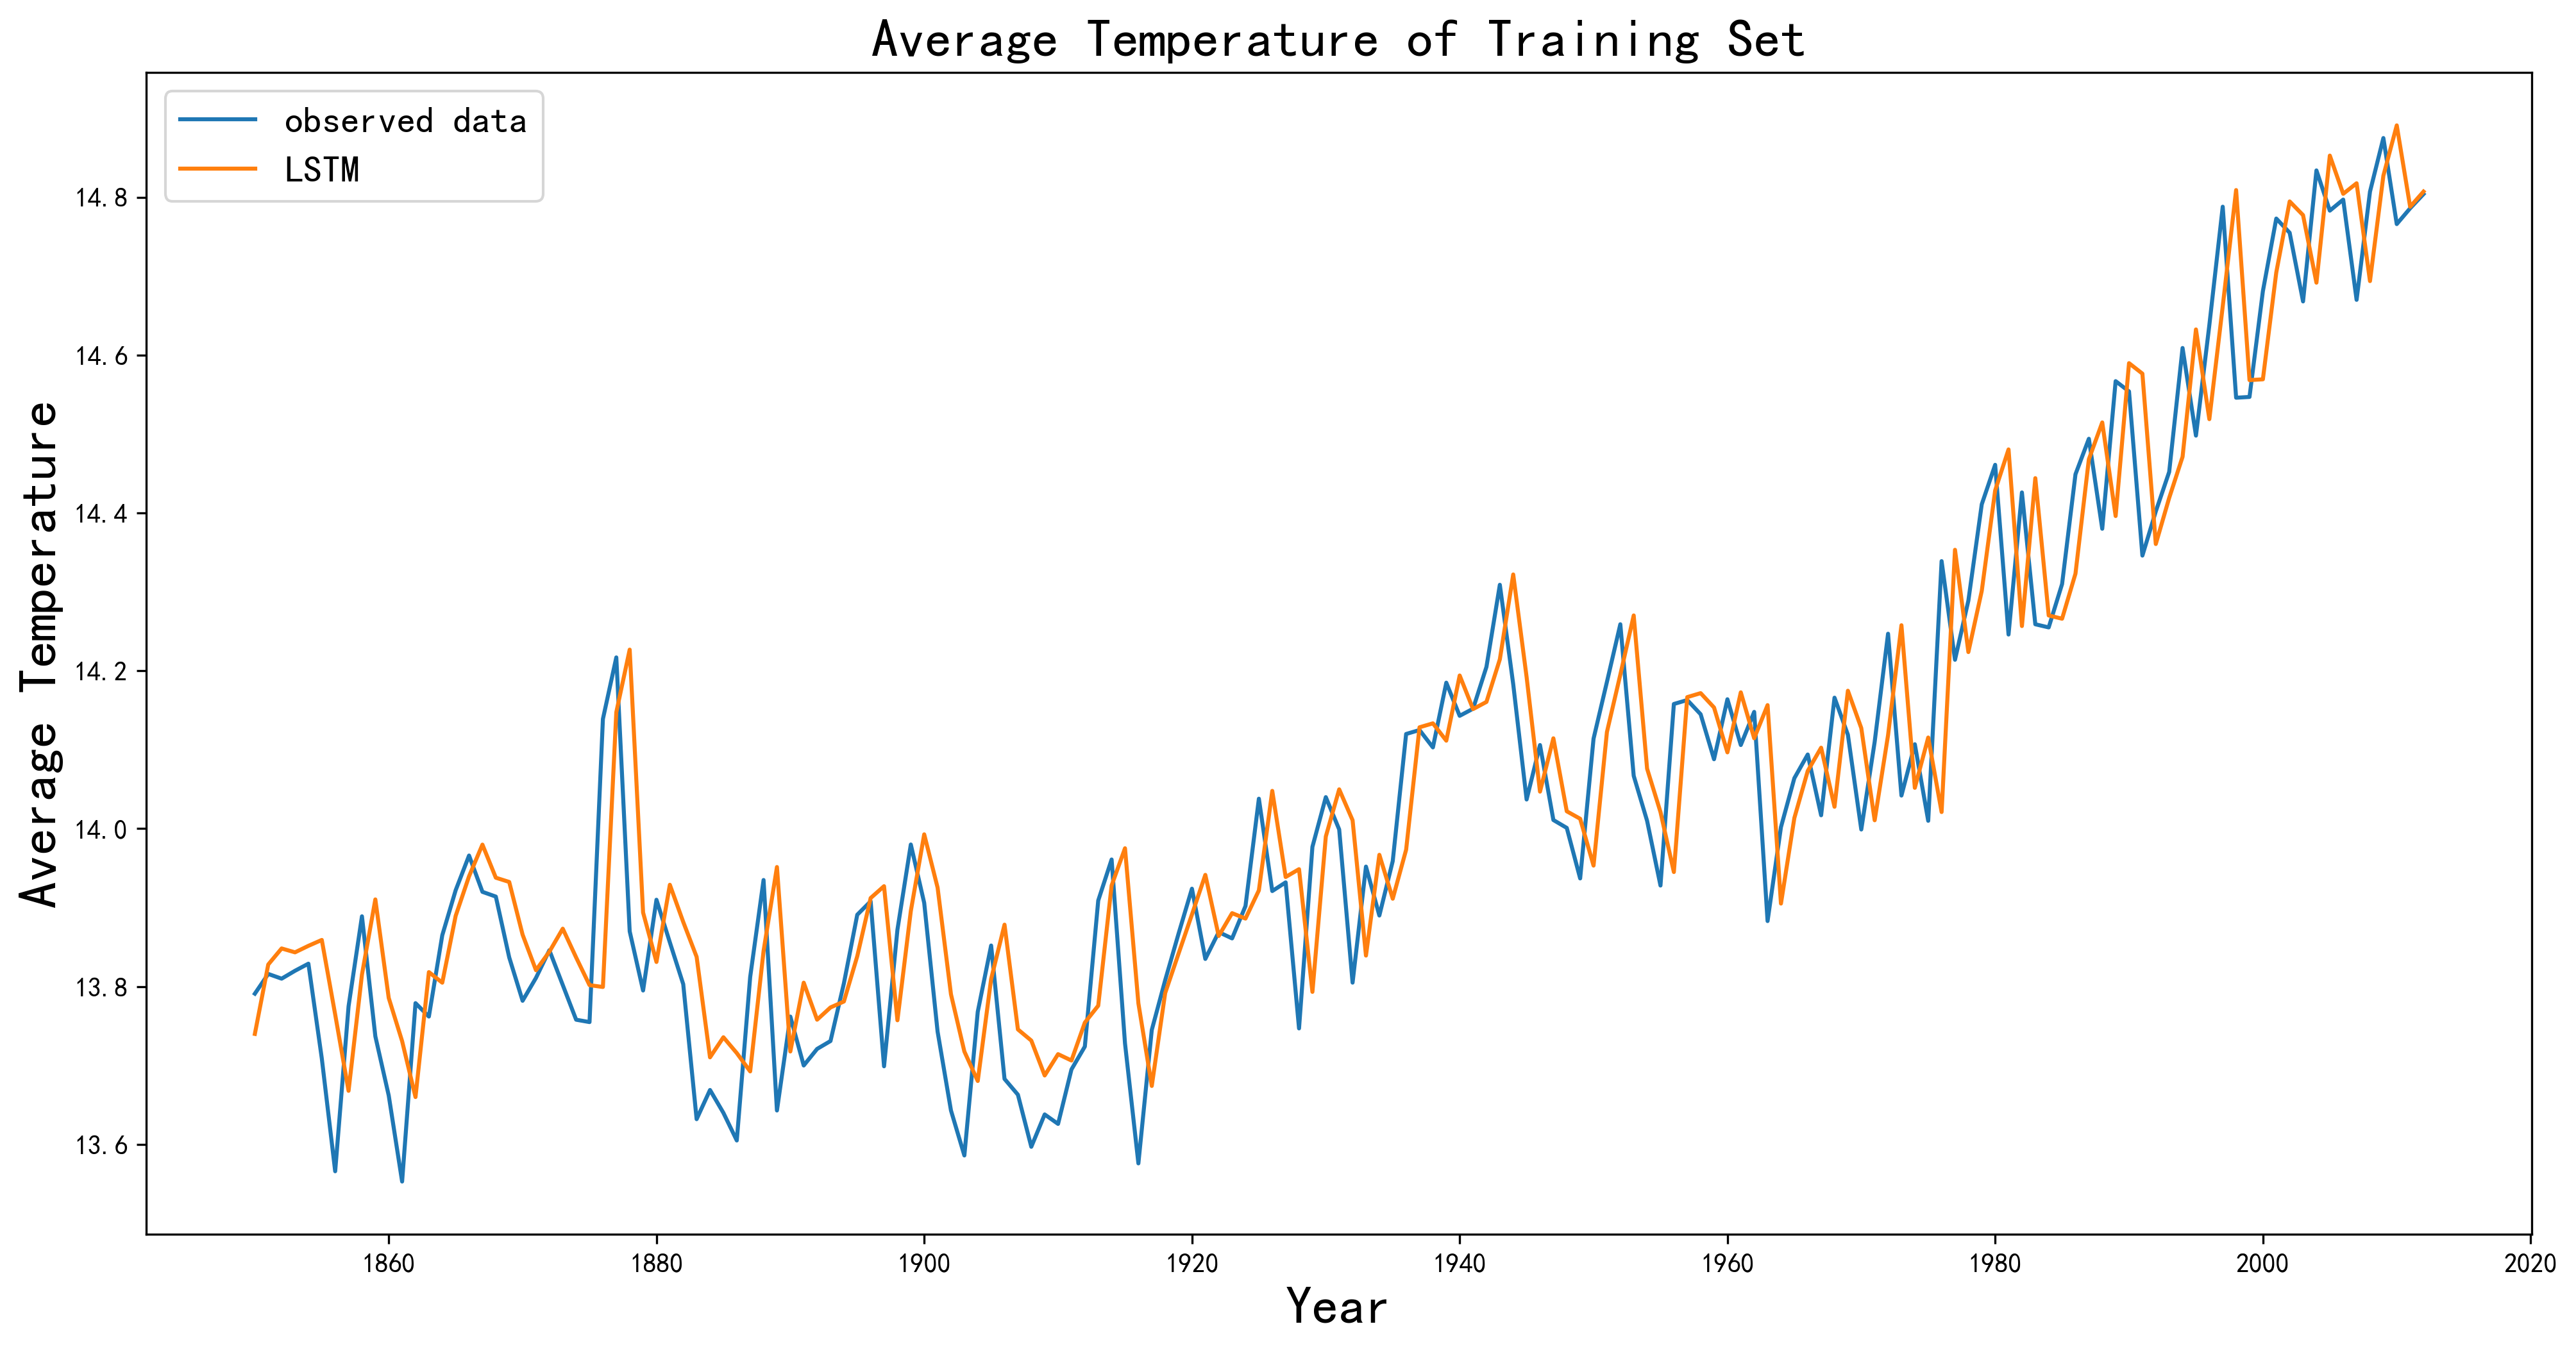

In [527]:
plt.figure(figsize=(16, 8),dpi=300)
plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示负号
plt.plot(df['Year'].values.astype('float32')[:test_size-1],trainY_, label='observed data')
plt.plot(df['Year'].values.astype('float32')[:test_size-1],trainPredict_, label='LSTM')
plt.xlabel( 'Year',fontsize=20)
plt.ylabel( 'Average Temperature',fontsize=20)
plt.legend(fontsize=14)
plt.title( 'Average Temperature of Training Set',fontsize=20)
plt.savefig('./训练集平均温度情况.jpg') 
plt.show()

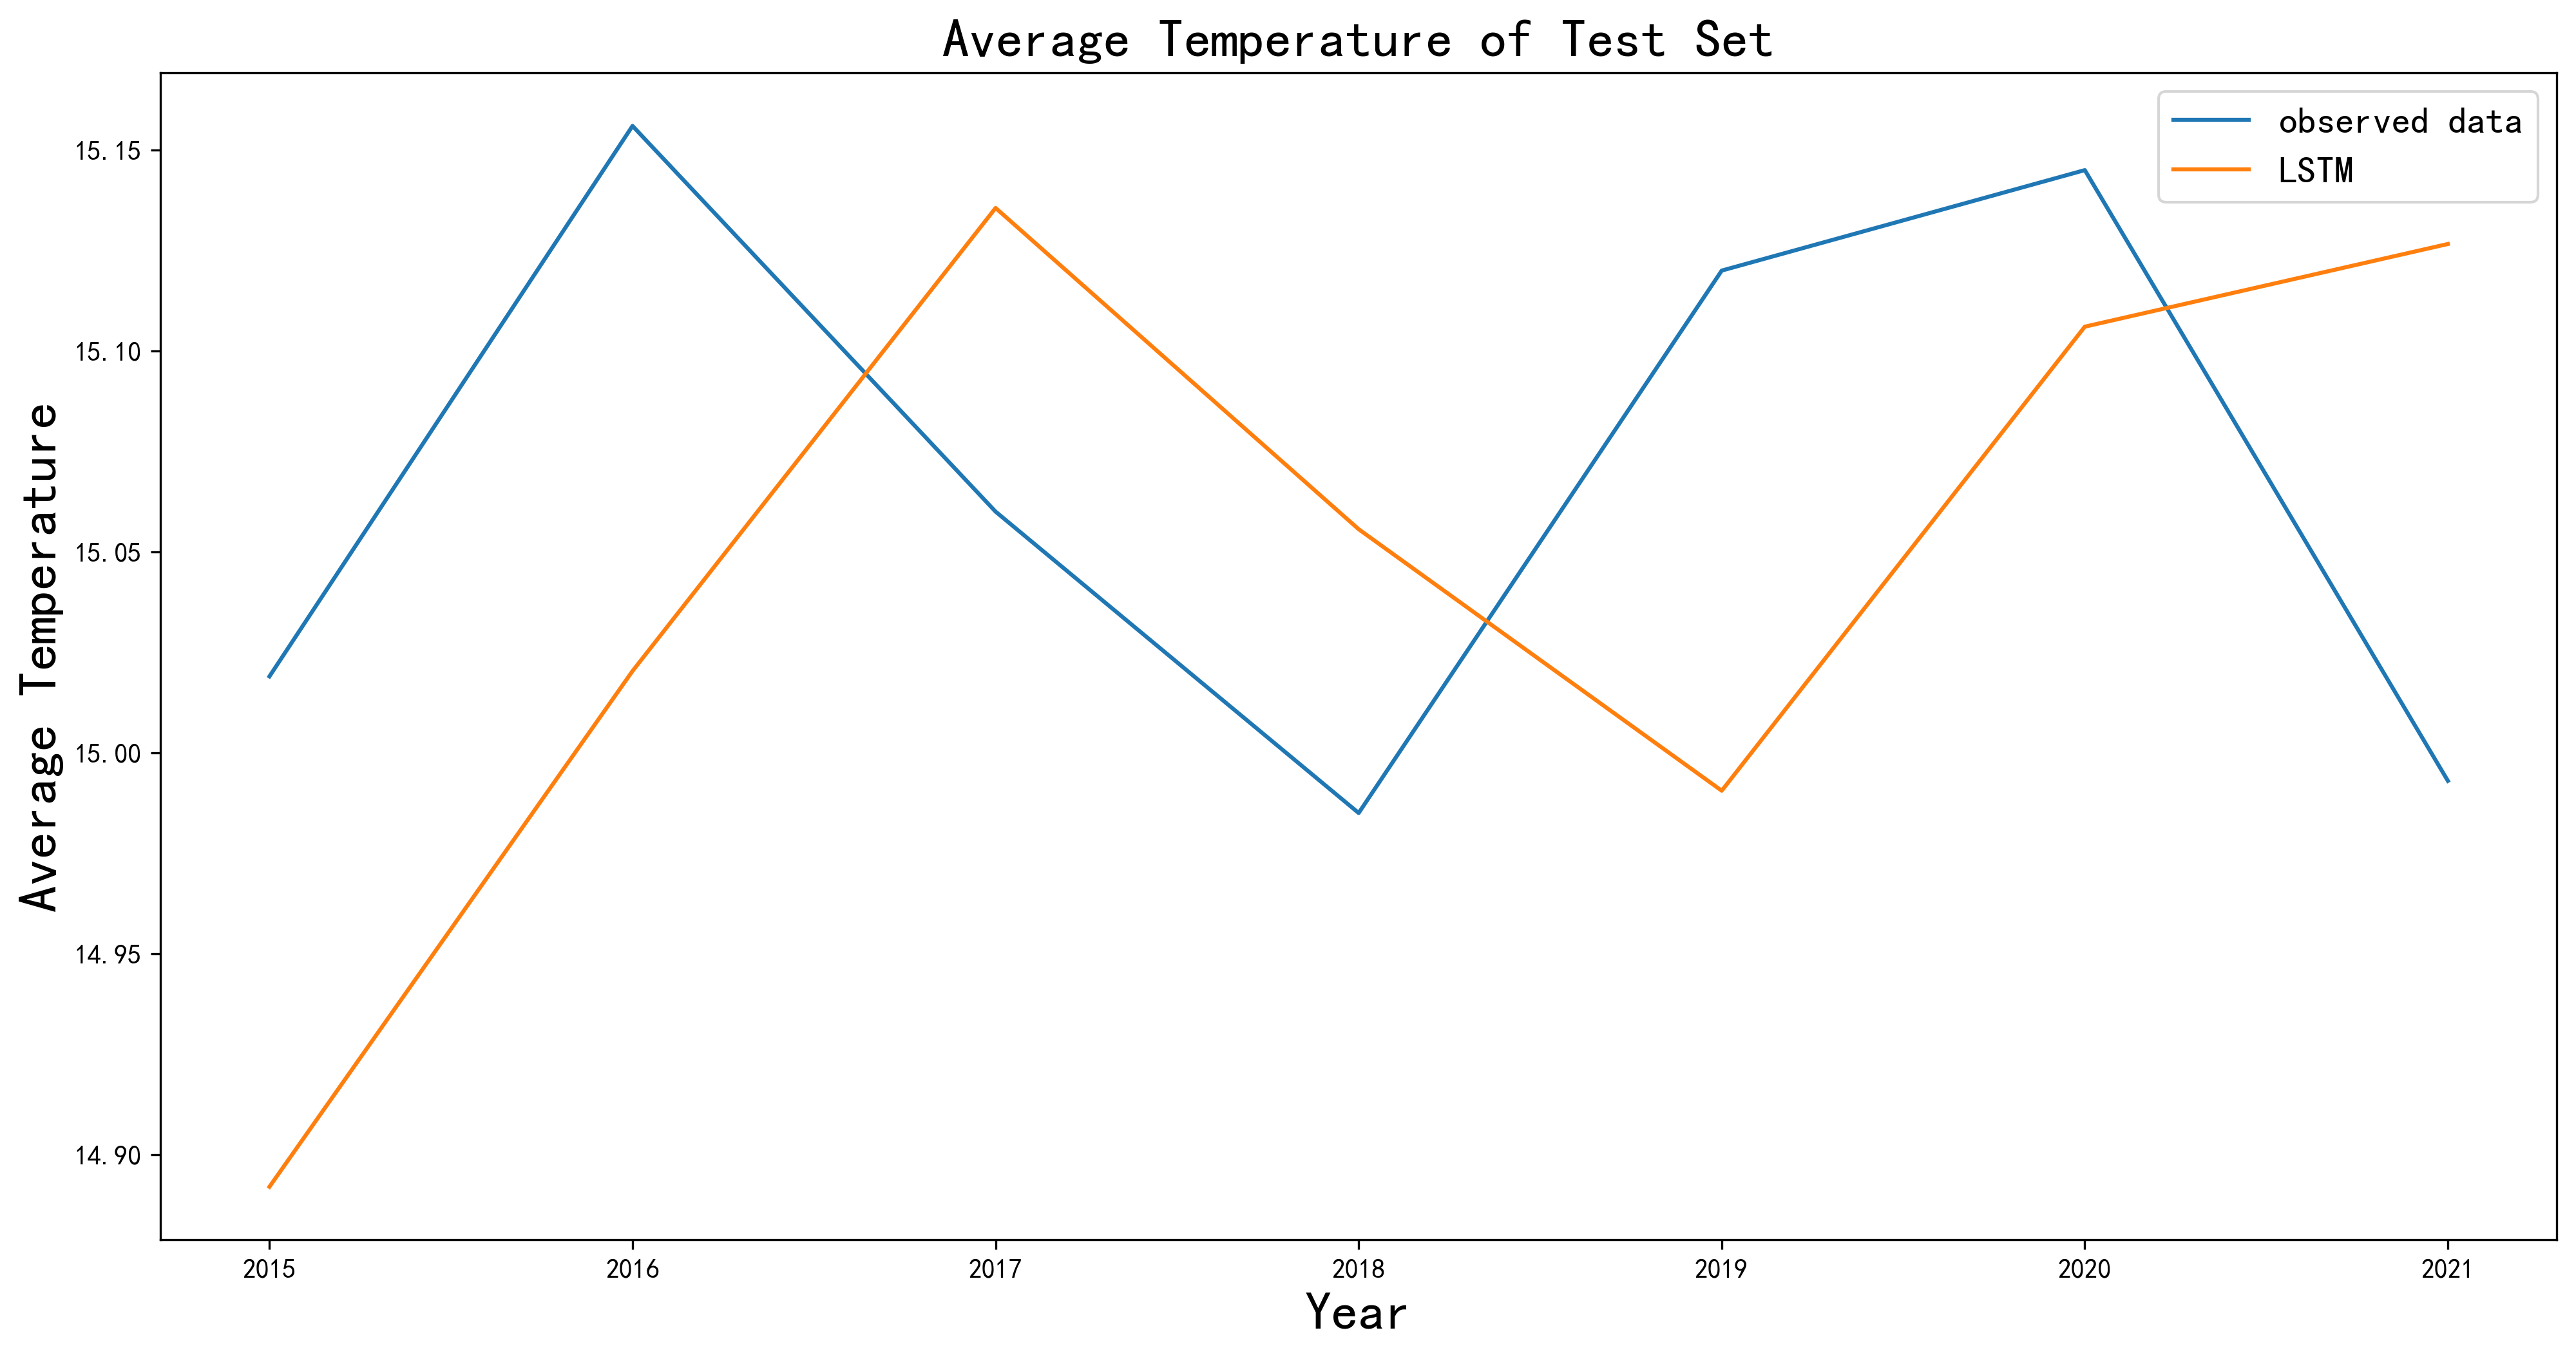

In [528]:
plt.figure(figsize=(16, 8),dpi=300)
plt.plot(df['Year'].values.astype('float32')[test_size+1:],testY_, label='observed data')
plt.plot(df['Year'].values.astype('float32')[test_size+1:],testPredict_, label='LSTM')
plt.xlabel( 'Year',fontsize=20)
plt.ylabel( 'Average Temperature',fontsize=20)
plt.legend(fontsize=14)
plt.title( 'Average Temperature of Test Set',fontsize=20)
plt.savefig('./测试集平均温度情况.jpg') 
plt.show()

In [534]:
x_input=trainY[-1]
predict_forword_number=102
predict_list=[]
predict_list.append(x_input)
while len(predict_list) < predict_forword_number:
    x_input = predict_list[-1].reshape((-1, 1, 1))
    yhat = model.predict(x_input, verbose=0)
    #预测新值
    predict_list.append(yhat)
    #取出    
    
Predict_forword = scaler.inverse_transform(np.array([ i.reshape(-1,1)[:,0].tolist() for i in predict_list]))

In [535]:

perdict = []

for i in Predict_forword:
    print(i)
    perdict.append(i[0])
print(perdict)

[14.80399972]
[14.82436501]
[14.84367997]
[14.86185965]
[14.87884423]
[14.89460028]
[14.90911834]
[14.9224113]
[14.93451109]
[14.9454647]
[14.95533118]
[14.96417762]
[14.97207681]
[14.97910385]
[14.98533423]
[14.9908417]
[14.99569698]
[14.99996761]
[15.0037157]
[15.00699933]
[15.00987145]
[15.01238012]
[15.01456851]
[15.01647542]
[15.01813544]
[15.01957933]
[15.02083443]
[15.0219248]
[15.02287147]
[15.02369298]
[15.02440547]
[15.02502337]
[15.025559]
[15.02602316]
[15.02642522]
[15.02677358]
[15.02707513]
[15.02733644]
[15.02756251]
[15.02775828]
[15.02792797]
[15.02807473]
[15.02820171]
[15.02831149]
[15.02840666]
[15.02848883]
[15.0285602]
[15.02862192]
[15.02867533]
[15.02872158]
[15.02876152]
[15.02879601]
[15.02882591]
[15.02885171]
[15.02887407]
[15.02889337]
[15.02891019]
[15.02892471]
[15.02893713]
[15.02894802]
[15.02895739]
[15.02896551]
[15.02897267]
[15.02897888]
[15.02898414]
[15.02898873]
[15.02899264]
[15.02899608]
[15.02899885]
[15.02900134]
[15.02900363]
[15.02900554]


In [536]:
print(df['Year'].values.astype('float32')[:test_size-1])
year = []
for i in range(2022,2022 + predict_forword_number):
    year.append(str(i))
year = {
    "year":year
}
year = pd.DataFrame(year)
year

[1850. 1851. 1852. 1853. 1854. 1855. 1856. 1857. 1858. 1859. 1860. 1861.
 1862. 1863. 1864. 1865. 1866. 1867. 1868. 1869. 1870. 1871. 1872. 1873.
 1874. 1875. 1876. 1877. 1878. 1879. 1880. 1881. 1882. 1883. 1884. 1885.
 1886. 1887. 1888. 1889. 1890. 1891. 1892. 1893. 1894. 1895. 1896. 1897.
 1898. 1899. 1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909.
 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920. 1921.
 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933.
 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944. 1945.
 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957.
 1958. 1959. 1960. 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969.
 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007. 2008. 2009. 2010. 2011. 2012.]


,year
0,2022
1,2023
2,2024
3,2025
4,2026
...,...
97,2119
98,2120
99,2121
100,2122


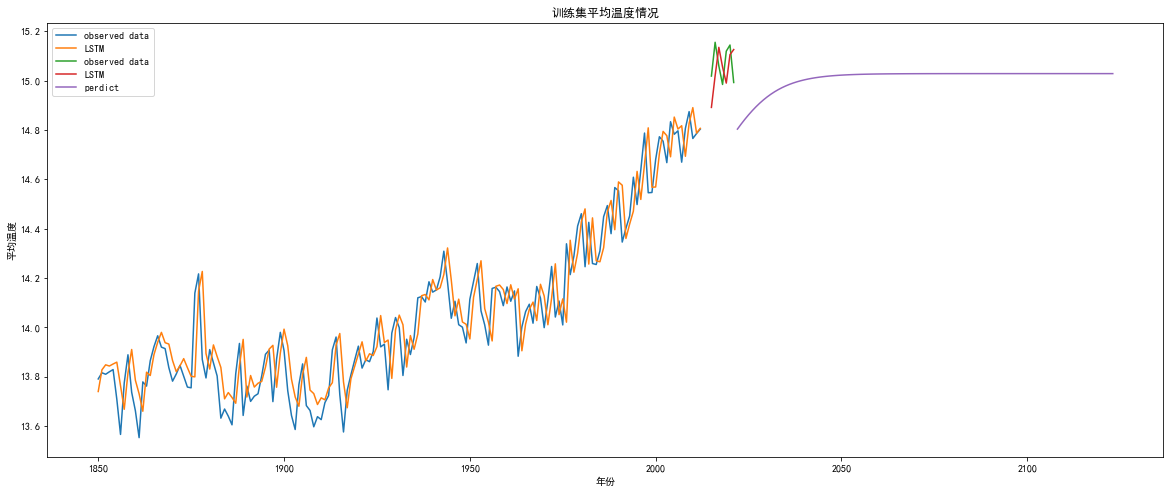

In [537]:
plt.figure(figsize=(20, 8))
plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示负号
plt.plot(df['Year'].values.astype('float32')[:test_size-1],trainY_, label='observed data')
plt.plot(df['Year'].values.astype('float32')[:test_size-1],trainPredict_, label='LSTM')
# plt.plot(df['Year'].values.astype('float32'),df["Annual Anomaly"], label='observed data')
plt.plot(df['Year'].values.astype('float32')[test_size+1:],testY_, label='observed data')
plt.plot(df['Year'].values.astype('float32')[test_size+1:],testPredict_, label='LSTM')

plt.plot(year["year"].values.astype('float32'), perdict, label='perdict')
plt.xlabel( '年份')
plt.ylabel( '平均温度')
plt.legend()
plt.title( '训练集平均温度情况')
# plt.savefig('./训练集平均温度情况.jpg') 
plt.show()

In [549]:
dataset=pd.concat([df[['Year','Annual Anomaly']],df['Annual Anomaly'].shift(1)],axis=1)
dataset.dropna(inplace=True,axis=0)
dataset.columns=['Year','X','Y']
train_X=dataset.iloc[:test_size,1].values.reshape(-1, 1)
train_y=dataset.iloc[:test_size,2].values.reshape(-1, 1)
test_X=dataset.iloc[test_size:,1].values.reshape(-1, 1)
test_y=dataset.iloc[test_size:,2].values.reshape(-1, 1)

In [433]:
dataset.iloc[:,1]

1      13.791
2      13.816
3      13.810
4      13.820
5      13.829
        ...  
167    15.060
168    14.985
169    15.120
170    15.145
171    14.993
Name: X, Length: 171, dtype: float64

In [447]:

import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')
#高维数据模型业界一般选择逻辑回归，速度快，准确率高
#线性回归
model_lr = LinearRegression()

model_lr.fit(train_X,train_y)
# print('线性回归')

print(score(model_lr.predict(test_X.reshape(-1, 1)),test_y))

MAPE :
0.6596066006456198
RMSE :
0.12529947930263632
MAE :
0.09861634266794383
None


In [476]:


# Randomforest回归

model_rf = RandomForestRegressor()

model_rf.fit(train_X,train_y)
print('Randomforest回归')

print(score(model_rf.predict(test_X.reshape(-1, 1)),test_y))

print('\n-----------')

# lgbm回归

model_lgb = lgb.LGBMRegressor()

model_lgb.fit(train_X,train_y)
print('lgbm回归')
print(score(model_lgb.predict(test_X.reshape(-1, 1)),test_y))

print('\n-----------')

# xgboost分类
model_xgb = xgb.XGBRegressor()

model_xgb.fit(train_X,train_y)
print('xgboost回归')
print(score(model_xgb.predict(test_X.reshape(-1, 1)),test_y))

Randomforest回归
MAPE :
1.7806467613146397
RMSE :
0.2887004340142185
MAE :
0.2627849999999965
None

-----------
lgbm回归
MAPE :
2.3799794839190636
RMSE :
0.36907569723696404
MAE :
0.3491774418772655
None

-----------
xgboost回归
MAPE :
1.4900934137653927
RMSE :
0.2508540270402517
MAE :
0.22053516387939442
None


In [436]:
# lr
x_input=train_y[-1]
predict_forword_number=100
predict_list=[]
predict_list.append(x_input)
while len(predict_list) < predict_forword_number:
    x_input = predict_list[-1].reshape((-1, 1))
    yhat = model_lr.predict(x_input)
    #预测新值
    predict_list.append(yhat)
    
lr_perdict = []

for i in predict_list:
    lr_perdict.append(i[0])
# print(perdict)

In [571]:
# rf
x_input = dataset.iloc[:,2].values.reshape(-1, 1)[-1]
# x_input=train_y[-1]
predict_forword_number=102
predict_list=[]
predict_list.append(x_input)
while len(predict_list) < predict_forword_number:
    x_input = predict_list[-1].reshape((-1, 1))
    yhat = model_rf.predict(x_input)
    #预测新值
    predict_list.append(yhat)
rf_perdict = []

for i in predict_list:
    rf_perdict.append(i[0])

In [438]:
# lgb
x_input=train_y[-1]
predict_forword_number=100
predict_list=[]
predict_list.append(x_input)
while len(predict_list) < predict_forword_number:
    x_input = predict_list[-1].reshape((-1, 1))
    yhat = model_lgb.predict(x_input)
    #预测新值
    predict_list.append(yhat)
lgb_perdict = []

for i in predict_list:
    lgb_perdict.append(i[0])

In [439]:
# xgb
x_input=train_y[-1]
predict_forword_number=100
predict_list=[]
predict_list.append(x_input)
while len(predict_list) < predict_forword_number:
    x_input = predict_list[-1].reshape((-1, 1))
    yhat = model_xgb.predict(x_input)
    #预测新值
    predict_list.append(yhat)
xgb_perdict = []

for i in predict_list:
    xgb_perdict.append(i[0])

In [559]:
year = []
for i in range(2021,2022 + predict_forword_number + 1):
    year.append(str(i))
year = {
    "year":year
}
year = pd.DataFrame(year)
year

,year
0,2021
1,2022
2,2023
3,2024
4,2025
...,...
97,2118
98,2119
99,2120
100,2121


In [500]:
from gm11 import GM11
x = np.array(Land_and_Ocean_data["Annual Anomaly"])
result = GM11(x,102)#预测结果,一阶差分偏自相关图,一阶差分自相关图
gm_perdict = result['predict']['value']
# predict = np.round(predict,1)
# print('真实值:',y)
print('预测值:',gm_perdict)
print(result)

预测值: [14.68235404 14.68935701 14.69636331 14.70337296 14.71038595 14.71740228
 14.72442196 14.73144499 14.73847137 14.7455011  14.75253419 14.75957062
 14.76661042 14.77365357 14.78070008 14.78774995 14.79480319 14.80185979
 14.80891975 14.81598308 14.82304978 14.83011986 14.8371933  14.84427012
 14.85135031 14.85843388 14.86552083 14.87261116 14.87970487 14.88680196
 14.89390244 14.9010063  14.90811356 14.9152242  14.92233824 14.92945567
 14.93657649 14.94370071 14.95082833 14.95795934 14.96509376 14.97223158
 14.97937281 14.98651744 14.99366548 15.00081693 15.00797179 15.01513006
 15.02229175 15.02945685 15.03662537 15.04379731 15.05097267 15.05815146
 15.06533366 15.07251929 15.07970835 15.08690084 15.09409676 15.10129611
 15.1084989  15.11570512 15.12291478 15.13012787 15.13734441 15.14456439
 15.15178781 15.15901468 15.16624499 15.17347876 15.18071597 15.18795664
 15.19520076 15.20244833 15.20969936 15.21695385 15.2242118  15.23147321
 15.23873809 15.24600643 15.25327823 15.260553

In [442]:
t = 0
for i in gm_perdict:
    t += 1
    if i >= 20:
        print(t)
        break

In [516]:
arima_perdict_data = pd.read_excel("arima预测.xlsx")
arima_perdict = arima_perdict_data["temp"][:102]
print(arima_perdict)

0      15.004915
1      15.046968
2      15.060284
3      15.062590
4      15.075297
         ...    
97     15.784679
98     15.792357
99     15.799989
100    15.807665
101    15.815299
Name: temp, Length: 102, dtype: float64


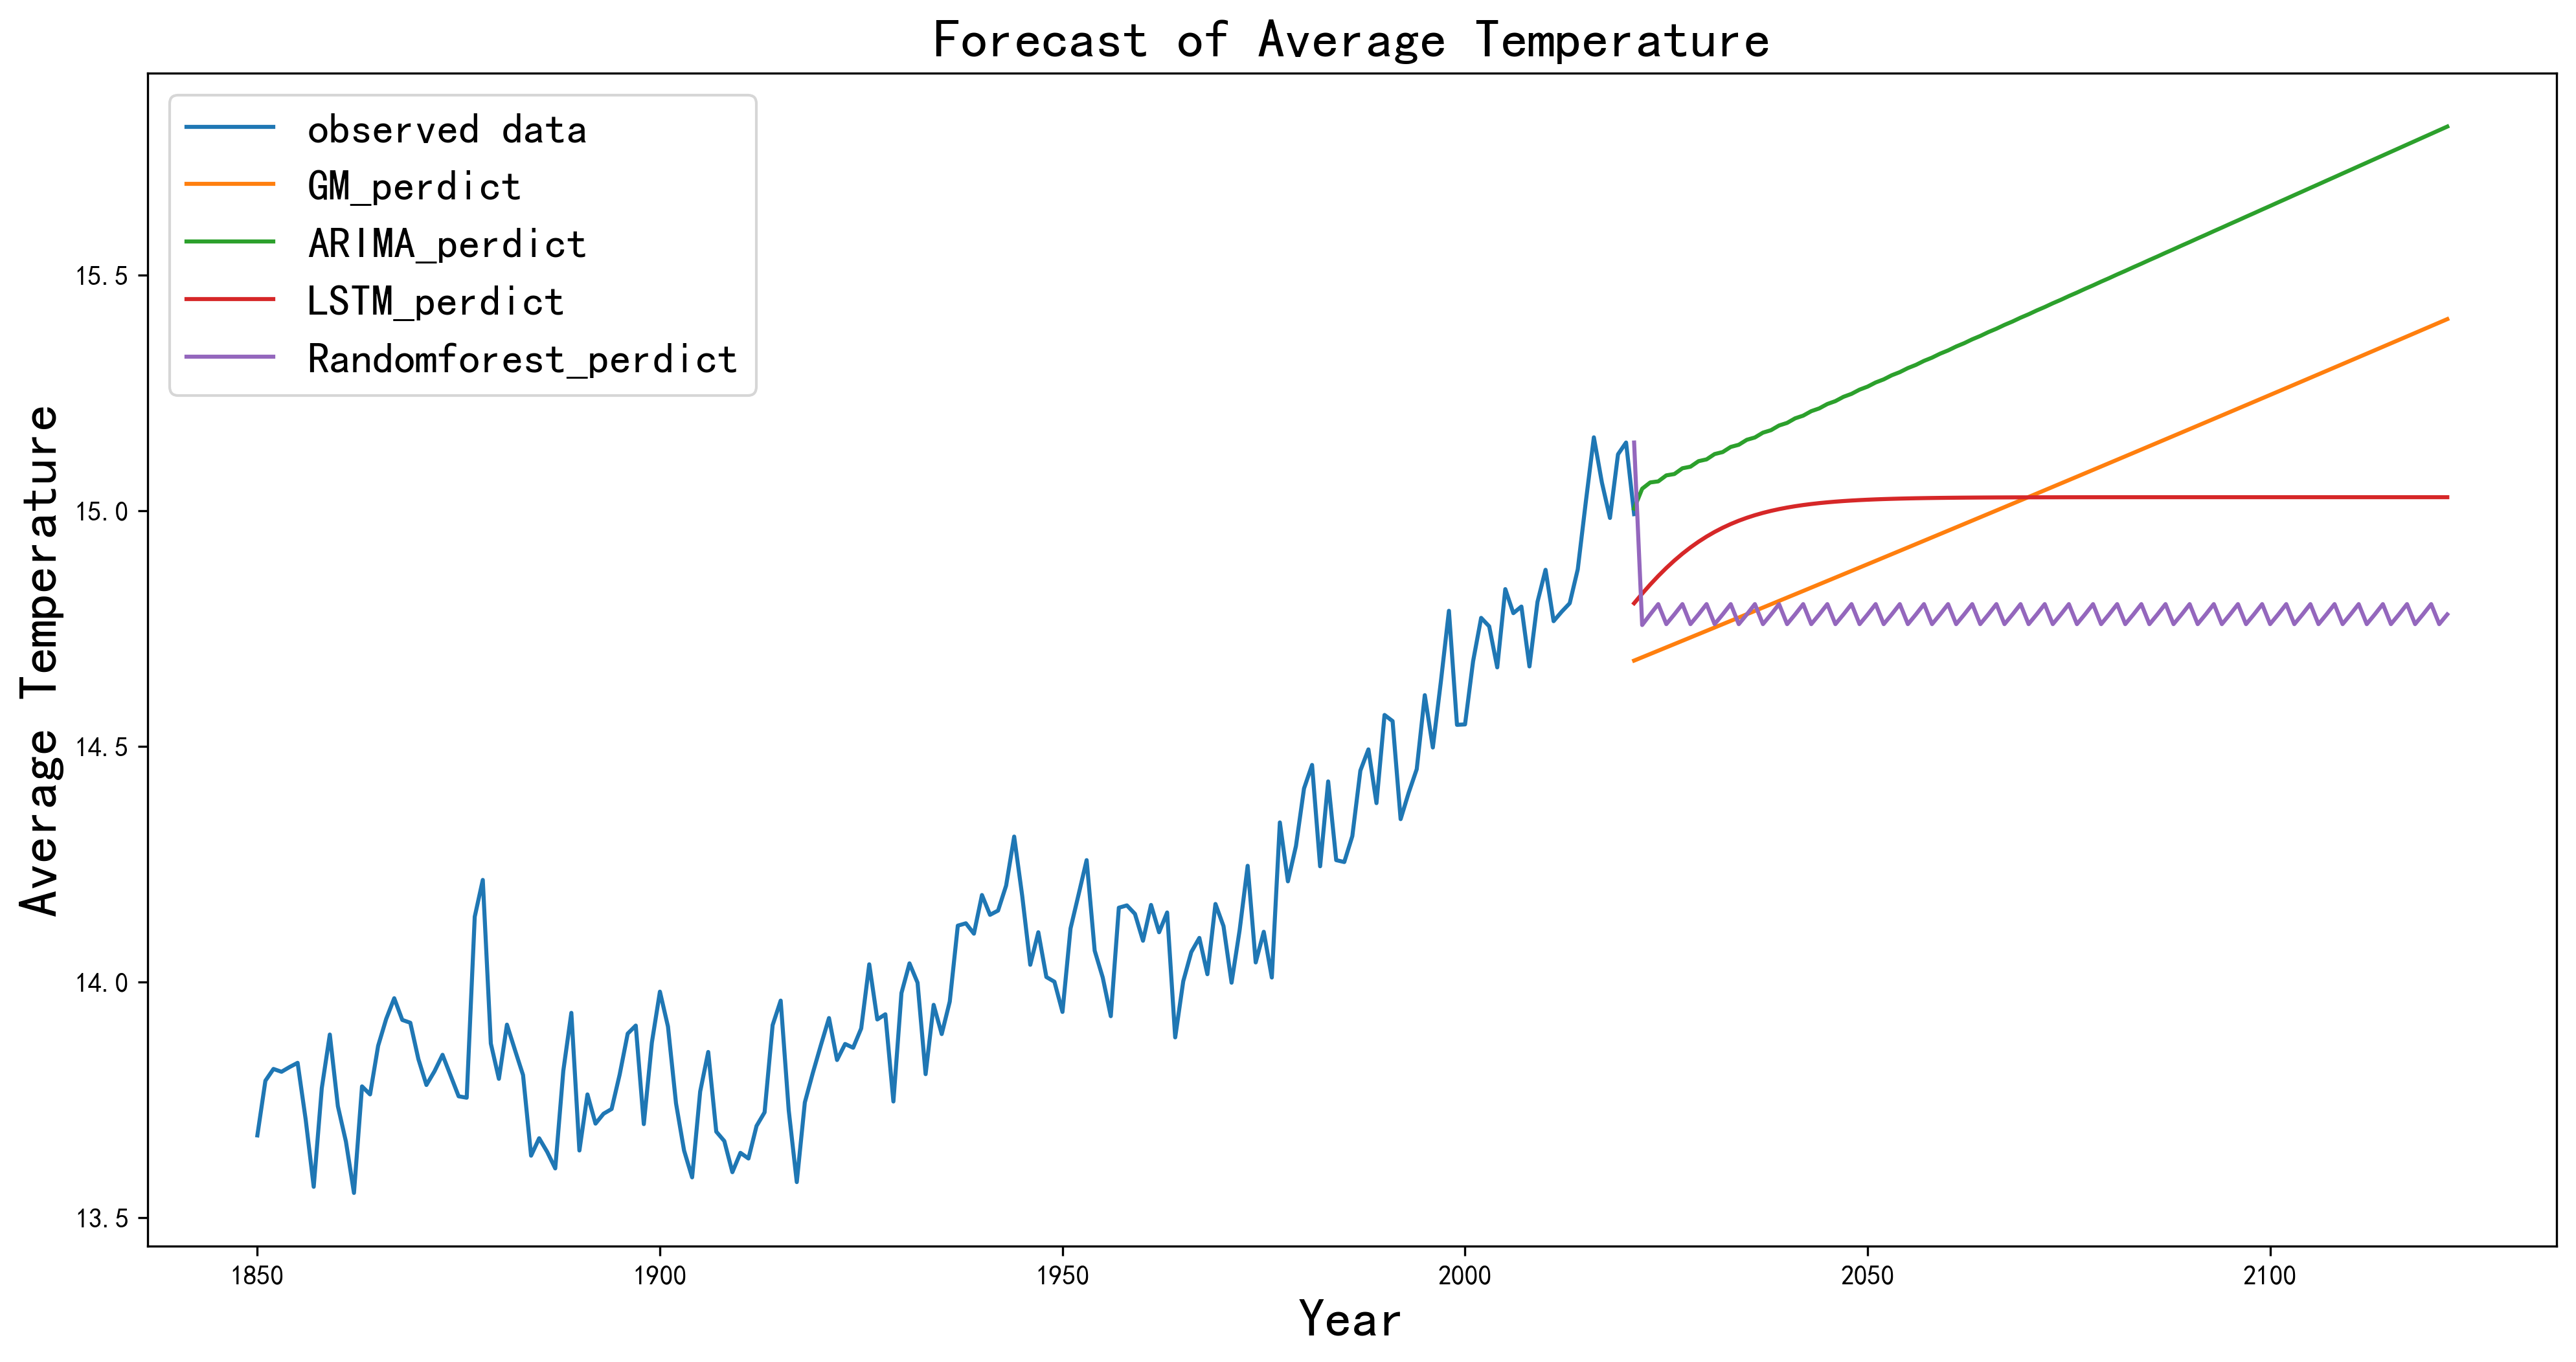

In [576]:
plt.figure(figsize=(16, 8), dpi=300)
plt.rcParams['font.sans-serif'] = ['SimHei']    #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False      #用来正常显示负号
# plt.plot(df['Year'].values.astype('float32')[:test_size-1],trainY_, label='train observed data')
# plt.plot(df['Year'].values.astype('float32')[:test_size-1],trainPredict_, label='train LSTM')
plt.plot(df['Year'].values.astype('float32'),df["Annual Anomaly"], label='observed data')
# plt.plot(df['Year'].values.astype('float32')[test_size+1:],testY_, label='test observed data')
# plt.plot(df['Year'].values.astype('float32')[test_size+1:],testPredict_, label='test LSTM')

plt.plot(year["year"].values.astype('float32'), gm_perdict, label='GM_perdict')
plt.plot(year["year"].values.astype('float32'), arima_perdict, label='ARIMA_perdict')
plt.plot(year["year"].values.astype('float32'), perdict, label='LSTM_perdict')
plt.plot(year["year"].values.astype('float32'), rf_perdict, label='Randomforest_perdict')
# plt.plot(year["year"].values.astype('float32'), lr_perdict, label='lr_perdict')
# plt.plot(year["year"].values.astype('float32'), xgb_perdict, label='xgb_perdict')
# plt.plot(year["year"].values.astype('float32'), lgb_perdict, label='lgb_perdict')
plt.xlabel( 'Year', fontsize=20)
plt.ylabel( 'Average Temperature', fontsize=20)
plt.legend(fontsize=16)
plt.title( 'Forecast of Average Temperature', fontsize=20)
plt.savefig('./预测平均温度预测情况.jpg') 
plt.show()

In [575]:
perdict_data = {}
perdict_data["year"] = list(year["year"])
perdict_data["gm_perdict"] = gm_perdict
perdict_data["arima_perdict"] = arima_perdict
perdict_data["lstm_perdict"] = perdict
perdict_data["rf_perdict"] = rf_perdict
len(perdict_data["rf_perdict"])
pd.DataFrame(perdict_data,columns=["year","gm_perdict","arima_perdict","lstm_perdict","rf_perdict"]).to_excel('perdict_data.xlsx')